In [2]:
# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
df = pd.read_csv("C:/Users/arnab/OneDrive/Desktop/DATASETS/digit-recognizer/train.csv")

print(df.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = df['label']
# Drop the label feature and store the pixel data in d.
d = df.drop("label",axis=1)

#shape of data
print(df.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

***PCA DATA VISUALIZATION:***

In [3]:
#Taking 20000 data set points 
labels = l.head(10000)
labels_n=l.head(1000)
data = df.head(10000)
print(labels.shape)
print(data.shape)

(10000,)
(10000, 785)


STEP-1:STANDARIZE THE DATA

In [4]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler
std_data= StandardScaler().fit_transform(data)
print(std_data.shape)

(10000, 785)


STEP-2:FORM COVARIANCE MATRIX

In [5]:
temp_data = std_data
cov_matrix = np.matmul(temp_data.T,temp_data)
print(cov_matrix.shape)

(785, 785)


STEP-3:FIND THE EIGEN VALUES AND EIGEN VECTORS:

In [6]:
from scipy.linalg import eigh
#Choosing the top 2 eigen vectors to get top 2 features with highest variance
vals,vecs= eigh(cov_matrix,eigvals=(783,784))
print(vecs.shape)
vecs = vecs.T
print(vecs.shape)

(785, 2)
(2, 785)


C:\Users\arnab\AppData\Local\Temp\ipykernel_22800\975142197.py:3: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  vals,vecs= eigh(cov_matrix,eigvals=(783,784))


STEP-4:FINDING RESULT DATASET:

In [7]:
reduced_data = np.matmul(vecs,temp_data.T)
print(reduced_data.shape)
labels = np.array(labels).reshape(-1,1).T
print(labels.shape)

(2, 10000)
(1, 10000)


PLOTTING FINAL FEATURES:

In [8]:
import pandas as pd
reduced_data = np.vstack((reduced_data,labels)).T

dataframe = pd.DataFrame(data=reduced_data, columns=("1st_principal", 
"2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       5.776779       4.811716    1.0
1      -6.809899     -19.003810    0.0
2       2.343897       7.408233    1.0
3      -5.372698       0.713531    4.0
4      -7.317385     -26.291335    0.0


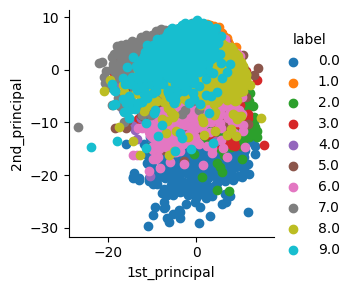

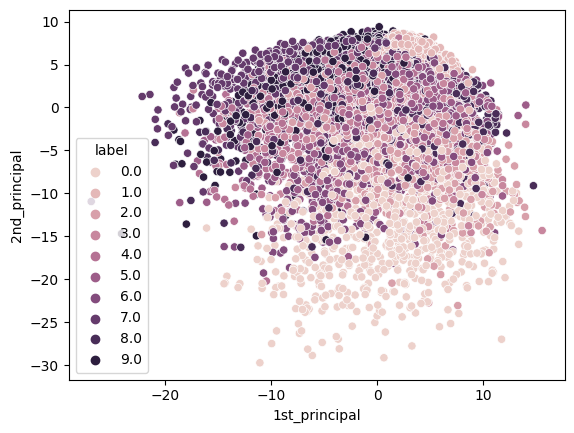

In [9]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe,hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",
data=dataframe)
plt.show()

***PCA USING INBUILT FUNC IN SKLEARN:***

In [10]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components=2

In [11]:
pca_data = pca.fit_transform(temp_data).T
print(pca_data.shape)

(2, 10000)


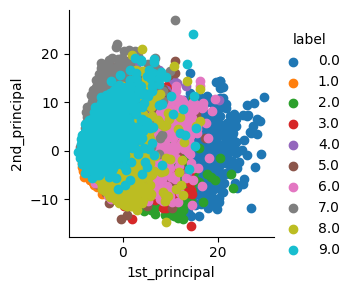

In [12]:
pca_data = np.vstack((pca_data,labels)).T

pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', 
'2nd_principal').add_legend()
plt.show()

***PCA FOR DIMENSION REDUCTION NOT VISUALIZATION:***

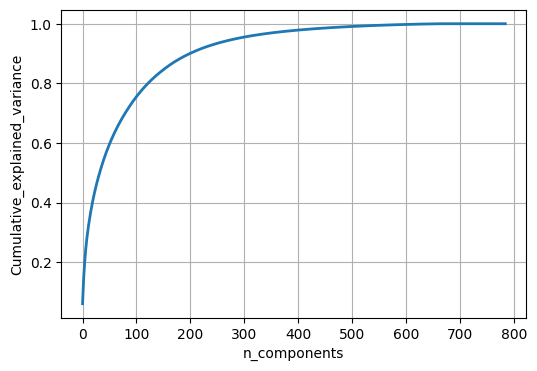

In [13]:
pca.n_components = 785
pca_data = pca.fit_transform(temp_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.
explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

***t-SNE USING SKLEARN:***

In [14]:
from sklearn.manifold import TSNE
data_n = std_data[0:1000]
label_n= np.array(labels_n).reshape(-1,1).T
print(data_n.shape)
print(label_n.shape)

(1000, 785)
(1, 1000)


(1000, 2)


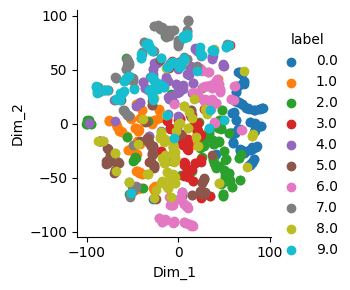

In [15]:
model = TSNE(n_components=2, random_state=0,perplexity=2,n_iter=1000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_n)
print(tsne_data.shape)
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label_n)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()